<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/911_%EB%89%B4%EC%8A%A4%EA%B7%B8%EB%A3%B9%EB%B6%84%EB%A5%98_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 뉴스 그룹 분류 
    - DACON 뉴스토픽분류 AI 경진대회
    https://dacon.io/competitions/official/235747/overview/description
    - Train / Test 데이터로 분류 되어있으며, 
    뉴스의 카테고리에 해당하는 내용이 topic dict 자료에 들어있습니다

- 파일 불러오기 / 경로설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/뉴스 토픽 분류 AI 경진대회')
# os 의 chdir 메서드는 체인지 디렉토리의 의미로서 작업폴더를 설정해 주어. 파일 불러오기시에 유용하다.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [ ]:
train      = pd.read_csv("open/train_data.csv")
test       = pd.read_csv("open/test_data.csv")
submission = pd.read_csv("open/sample_submission.csv")
topic_dict = pd.read_csv("open/topic_dict.csv")

## 데이터 탐색 및 트레인/테스트 셋 준비

In [ ]:
# !pip install hanja

In [ ]:
# import hanja
# hanja.translate(train.title[3], 'substitution')
# hanja.translate(train.title[3], 'combination-text')

- Train

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45654 entries, 0 to 45653
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      45654 non-null  int64 
 1   title      45654 non-null  object
 2   topic_idx  45654 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
train.head(3)

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4


In [ ]:
train.shape

(45654, 3)

In [ ]:
train.title = train.title.str.replace('[^가-힣ㄱ-ㅎㅏ-ㅣ ]', '') # 한글만 남기고 제거하기
train.title.values
# ('[^ㄱ-ㅎㅏ-ㅣ가-힣|A-Za-z|0-9 ]', '')  정규표현식 한글, 영어, 숫자 이외 제거

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


array(['인천핀란드 항공기 결항휴가철 여행객 분통', '실리콘밸리 넘어서겠다구글 조원 들여 전역 거점화',
       '이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것', ..., '게시판 키움증권  키움 영웅전 실전투자대회',
       '답변하는 배기동 국립중앙박물관장', ' 한국인터넷기자상 시상식 내달 일 개최특별상 김성후'], dtype=object)

- Test

In [ ]:
test.isnull().sum() 

index    0
title    0
dtype: int64

In [ ]:
test.head(3) # topic idx 뉴스그룹번호 없어. 
# test data를 test set으로 활용 불가. 
# train set 일부를 test set으로 활용. 
# train / test 분할 및 validation set 만들어두기

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다


In [ ]:
test.title = test.title.str.replace('[^가-힣ㄱ-ㅎㅏ-ㅣ ]', '') # 한글만 남기고 제거하기
test.title.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


array(['유튜브 내달 일까지 크리에이터 지원 공간 운영', '어버이날 맑다가 흐려져남부지방 옅은 황사',
       '내년부터 국가 평가 때 논문건수는 반영 않는다', ..., '년 전 부마항쟁 부산 시위 사진 점 최초 공개',
       '게시판 아리랑 아프리카개발은행 총회 개회식 생중계', '유영민 과기장관 강소특구는 지역 혁신의 중심지원책 강구'],
      dtype=object)

- train / test set 분할

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train.title.values, train.topic_idx.values, test_size=0.2, random_state=2022, 
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36523,), (9131,), (36523,), (9131,))

- train / validation set 분할

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=2022
)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((29218,), (7305,), (29218,), (7305,))

In [ ]:
type(X_train), type(y_train), type(X_test), type(X_val)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

## 피쳐 벡터화 - 케라스의 토크나이저

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
t = Tokenizer()
t.fit_on_texts(X_train)

In [ ]:
print(tok.word_index)
# 케라스의 토크나이저는 단어 빈도수에 기반하여 토큰화된 단어에 인덱스를 부여한다.

{'대통령': 1, '일': 2, '명': 3, '첫': 4, '년': 5, '등': 6, '월': 7, '게시판': 8, '신간': 9, '출시': 10, '감독': 11, '이란': 12, '분기': 13, '억원': 14, '것': 15, '위': 16, '트럼프': 17, '대': 18, '만에': 19, '한국': 20, '전': 21, '개': 22, '개최': 23, '개발': 24, '정부': 25, '문': 26, '월드컵': 27, '그래픽': 28, '작년': 29, '경기': 30, '올해': 31, '새': 32, '삼성': 33, '코로나': 34, '더': 35, '코스피': 36, '중': 37, '연속': 38, '류현진': 39, '김정은': 40, '최대': 41, '지원': 42, '꺾고': 43, '국내': 44, '또': 45, '서울': 46, '서비스': 47, '공개': 48, '중국': 49, '네이버': 50, '도': 51, '북한': 52, '여행': 53, '터키': 54, '후': 55, '특징주': 56, '프로농구': 57, '연승': 58, '미국': 59, '영업익': 60, '사망': 61, '주말': 62, '전국': 63, '아시안게임': 64, '추진': 65, '스마트폰': 66, '시즌': 67, '가능성': 68, '안': 69, '세계': 70, '내년': 71, '한': 72, '최고': 73, '투자': 74, '차': 75, '대표': 76, '총리': 77, '속': 78, '결정': 79, '갤럭시': 80, '점': 81, '논란': 82, '시리아': 83, '규모': 84, '증가': 85, '에': 86, '천억원': 87, '개막': 88, '삼성전자': 89, '듯': 90, '리그': 91, '영상': 92, '주년': 93, '위한': 94, '내달': 95, '확대': 96, '선': 97, '논의': 98, '러시아': 99, '선정': 100, '번째': 

In [ ]:
print(t.word_counts)

OrderedDict([('월드컵', 224), ('독일파', 3), ('손흥민구자철', 2), ('독일전', 6), ('투톱장현수', 2), ('선발', 75), ('중국', 170), ('앱', 62), ('개발자들', 1), ('애플', 62), ('갑질에', 2), ('분노', 7), ('폭발', 40), ('특징주', 159), ('항공주', 2), ('유가하락원화강세에', 1), ('함박웃음종합', 1), ('구글', 70), ('한국어', 11), ('비서', 8), ('제공', 59), ('시점', 6), ('확정되지', 1), ('않았다', 12), ('유라시아', 5), ('경제연합위원회', 1), ('상품', 14), ('정보', 25), ('교환', 9), ('합의', 94), ('최고위원회의', 8), ('참석하는', 21), ('이해찬', 47), ('대표', 142), ('코로나', 202), ('한미', 31), ('언론', 66), ('온라인', 82), ('합동', 10), ('토론', 17), ('사이테크', 8), ('플러스', 13), ('장기간', 2), ('효과', 45), ('지속', 34), ('치매치료물질', 1), ('개발임상시험', 1), ('추진', 150), ('제주도', 18), ('남부', 15), ('호우경보', 2), ('대치시간당', 1), ('강한', 34), ('비', 61), ('월', 478), ('쇼핑대목', 1), ('아마존', 11), ('프라임데이', 1), ('올해는', 12), ('시간', 70), ('고군분투', 2), ('시즌', 148), ('서재덕', 5), ('덕큐리로', 1), ('활짝', 16), ('웃다종합', 1), ('현장', 43), ('첨단', 8), ('로봇', 35), ('한자리에', 8), ('로보월드', 1), ('개막', 128), ('영상', 124), ('법무장관으로', 1), ('돌아온', 32), ('조국과기장관은', 1), ('반도체', 25

In [ ]:
# 빈도수가 2미만인 단어를 제거, 

words_frequency = [w for w,c in t.word_counts.items() if c < 2]
# 빈도수가 2미만인 단어를 w라고 저장
for w in words_frequency:
    del t.word_index[w]
    del t.word_counts[w]

In [ ]:
print(t.texts_to_sequences(X_train))
print(t.word_index)

[[27, 7393, 10377, 3972, 10378, 207], [49, 266, 267, 10379, 3419, 489], [56, 10380], [229, 2188, 3020, 289, 3973, 1974], [4692, 1690, 932, 2690, 143], [3021, 1130, 396, 76], [34, 711, 246, 178, 2393, 1393], [3022, 1819, 10381, 422, 623, 65], [1299, 1578, 10382, 624, 273], [7, 2189, 1975, 230], [10383, 67, 4693, 1491], [448, 3023, 592, 3024, 88], [92, 674, 933, 10384, 7394], [10385, 3974, 23], [654, 7395, 3975, 4694, 5728, 977, 347], [268, 4695, 311, 10386, 10387, 7396], [28, 5, 27, 10388, 1492, 10389], [7397, 10390, 5729, 166], [5730, 10391, 3976, 1976, 10392, 1579, 158], [892, 10393, 625, 94, 3977, 107], [45, 3025, 175, 3978, 527], [403, 10394, 655, 396, 76], [449, 2394, 10395, 229, 1394], [40, 404, 10396, 1395], [9, 893, 1691, 7398], [326, 4696, 3420, 1820], [5731, 573, 13, 154, 3026], [8, 5732, 10397, 247], [7399, 3027], [95, 1692, 6, 1186, 318, 7400], [2691, 557, 45, 10398, 436], [1977, 269, 4697, 1493], [437, 194], [259, 7401, 4698, 3421, 195, 10399, 155], [1494, 5733, 7402, 7403,

In [ ]:
threshold = 2
total_cnt = len(t.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [ ]:
for key, value in t.word_counts.items():  # 딕셔너리라서 items()
    total_freq += value
    if value < threshold:   # 단어의 등장 빈도가 threshold보다 작을 경우
        rare_cnt += 1
        rare_freq += value

In [ ]:
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print(f'등장 빈도가 {threshold-1}번 이하인 희귀 단어의 수: {rare_cnt}')
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
# 위에서 등장빈도가 2미만인 단어를 제거했기에 희귀단어가 없음으로 표현됨

단어 집합(vocabulary)의 크기 : 17602
등장 빈도가 1번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [ ]:
vocab_size = total_cnt-rare_cnt + 2
vocab_size

17604

패딩

In [ ]:
X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)

In [ ]:
max_len = 6
X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((29218, 6), (29218,), (9131, 6), (9131,))

In [ ]:
print(y_train)
print(y_test)

[5 4 1 ... 4 1 2]
[1 5 4 ... 5 1 1]


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, GRU, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

- LSTM

In [ ]:
model_LSTM = Sequential([
        Embedding(vocab_size, 32, input_length=max_len),
        LSTM(64),
        Dense(7, activation='softmax')
])
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 6, 32)             563328    
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 588,615
Trainable params: 588,615
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일
model_LSTM.compile(loss='sparse_categorical_crossentropy',    # 스파스, 확률값 아닌 정수형태 클래스 
              optimizer='adam',
              metrics=['accuracy'])
model_path = 'newsgroup-lstm.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [ ]:
hist = model_LSTM.fit(
    X_train, y_train,
    validation_split=0.2, epochs=10, batch_size=64,
    callbacks=[mc,es]
)

Epoch 1/100
355/366 [============================>.] - ETA: 0s - loss: 1.3456 - accuracy: 0.4963
Epoch 00001: val_loss improved from inf to 0.90228, saving model to newsgroup-lstm.h5
366/366 [==============================] - 64s 8ms/step - loss: 1.3296 - accuracy: 0.5029 - val_loss: 0.9023 - val_accuracy: 0.7017
Epoch 2/100
356/366 [============================>.] - ETA: 0s - loss: 0.5768 - accuracy: 0.8147
Epoch 00002: val_loss improved from 0.90228 to 0.82684, saving model to newsgroup-lstm.h5
366/366 [==============================] - 2s 5ms/step - loss: 0.5775 - accuracy: 0.8137 - val_loss: 0.8268 - val_accuracy: 0.7271
Epoch 3/100
364/366 [============================>.] - ETA: 0s - loss: 0.3188 - accuracy: 0.8986
Epoch 00003: val_loss did not improve from 0.82684
366/366 [==============================] - 2s 5ms/step - loss: 0.3190 - accuracy: 0.8986 - val_loss: 0.9136 - val_accuracy: 0.7168
Epoch 4/100
360/366 [============================>.] - ETA: 0s - loss: 0.2047 - accuracy

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

286/286 [==============================] - 1s 3ms/step - loss: 0.8240 - accuracy: 0.7261


[0.8240062594413757, 0.7260978817939758]

# 1. oov 를 주지 않고, test 해볼것. 

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print('제목의 평균길이 :',sum(map(len, X_train))/len(X_train))
print('제목의 최대 길이 :',max(len(title) for title in X_train))

제목의 평균길이 : 6.300910397700048
제목의 최대 길이 : 12


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, GRU, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## GRU로 카테고리컬 분류 

In [ ]:
model_GRU = Sequential([
        Embedding(vocab_size, 32, input_length=max_len),
        GRU(64),
        Dense(7, activation='softmax')
])
model_GRU.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 6, 32)             563328    
                                                                 
 gru_3 (GRU)                 (None, 64)                18816     
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 582,599
Trainable params: 582,599
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일
model_GRU.compile(loss='sparse_categorical_crossentropy',    # 스파스, 확률값 아닌 정수형태 클래스 
              optimizer='adam',
              metrics=['accuracy'])
model_path = 'newsgroup-gru.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)

In [ ]:
hist = model_GRU.fit(X_train, y_train, 
                 validation_split=0.2, epochs=10, verbose=1,
                 callbacks=[mc,es]
)

Epoch 1/10
718/731 [============================>.] - ETA: 0s - loss: 1.2964 - accuracy: 0.5158
Epoch 00001: val_loss improved from inf to 0.96159, saving model to newsgroup-lstm.h5
731/731 [==============================] - 5s 5ms/step - loss: 1.2896 - accuracy: 0.5189 - val_loss: 0.9616 - val_accuracy: 0.6689
Epoch 2/10
721/731 [============================>.] - ETA: 0s - loss: 0.6134 - accuracy: 0.7990
Epoch 00002: val_loss improved from 0.96159 to 0.95129, saving model to newsgroup-lstm.h5
731/731 [==============================] - 3s 4ms/step - loss: 0.6145 - accuracy: 0.7988 - val_loss: 0.9513 - val_accuracy: 0.6810
Epoch 3/10
718/731 [============================>.] - ETA: 0s - loss: 0.3491 - accuracy: 0.8902
Epoch 00003: val_loss did not improve from 0.95129
731/731 [==============================] - 3s 5ms/step - loss: 0.3498 - accuracy: 0.8896 - val_loss: 1.1352 - val_accuracy: 0.6745
Epoch 4/10
726/731 [============================>.] - ETA: 0s - loss: 0.2341 - accuracy: 0.9

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

286/286 [==============================] - 1s 2ms/step - loss: 0.9275 - accuracy: 0.6884


[0.9274895787239075, 0.6884240508079529]

In [ ]:
topic_dict

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [ ]:
# X_test[3]
print(test.title[0]), print(pred_gru[0])
# 56퍼센트 사회, 43퍼센트 생활문화.

유튜브 내달 2일까지 크리에이터 지원 공간 운영
[3.1455152e-03 4.1081294e-04 5.6376517e-01 4.3265897e-01 1.4901002e-06
 1.0726338e-05 7.3197721e-06]


(None, None)

In [ ]:
print(test.title[1]), print(pred_gru[1])
# 생활문화지 않을까 싶은데. 99퍼확률로 생활문화란다.

어버이날 맑다가 흐려져…남부지방 옅은 황사
[6.8540203e-06 1.4387896e-06 2.6340002e-05 9.9995935e-01 7.2524613e-09
 4.3352152e-06 1.6678509e-06]


(None, None)

- GRU 모델 시각화

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_acc = hist.history['accuracy']
y_loss = hist.history['loss']
y_vacc = hist.history['val_accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1,len(y_acc)+1)

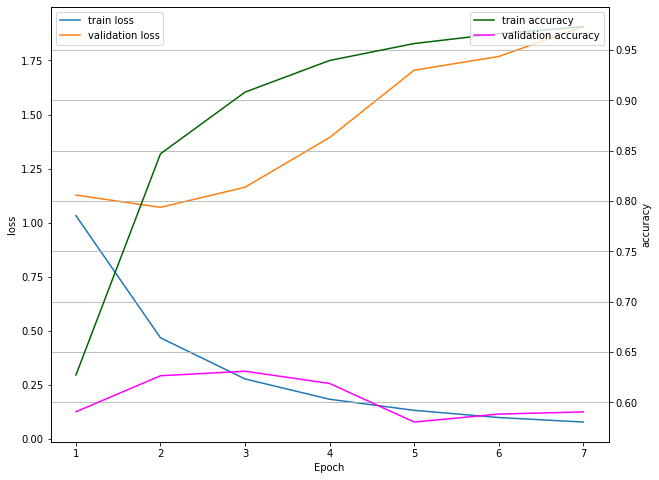

In [ ]:
_, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(xs, y_loss, label='train loss')
ax0.plot(xs, y_vloss, label='validation loss')
ax0.set_ylabel('loss')
ax1.plot(xs, y_acc, c='darkgreen', label='train accuracy')
ax1.plot(xs, y_vacc, c='magenta', label='validation accuracy')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('Epoch')
ax0.legend()
ax1.legend(loc=1)
plt.grid()
plt.show()

## LSTM 카테고리컬 분류 
    - 학습 5회로

In [ ]:
model_LSTM = Sequential([
        Embedding(vocab_size, 32, input_length=max_len),
        LSTM(64),
        Dense(7, activation='softmax')
])
model_LSTM.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 6, 32)             563328    
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_6 (Dense)             (None, 7)                 455       
                                                                 
Total params: 588,615
Trainable params: 588,615
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일
model_LSTM.compile(loss='sparse_categorical_crossentropy',    # 스파스, 확률값 아닌 정수형태 클래스 
              optimizer='adam',
              metrics=['accuracy'])
model_path = 'newsgroup-lstm.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)

In [ ]:
# 학습 5회로 조정
hist = model_LSTM.fit(X_train, y_train, 
                 validation_split=0.2, epochs=5, verbose=1,
                 callbacks=[mc,es]
)

ValueError: ignored

In [ ]:
# predict values
pred_lstm = model_LSTM.predict(X_test)
# pred_lstm

In [ ]:
topic_dict

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [ ]:
# X_test[3]
print(test.title[0]), print(pred_lstm[0])
# gru : 56퍼센트 사회, 43퍼센트 생활문화. 
# lstm : 92퍼 사회로 예측

유튜브 내달 2일까지 크리에이터 지원 공간 운영
[1.0166988e-02 3.0769760e-04 9.2305422e-01 6.6264667e-02 5.1519037e-06
 2.3779490e-05 1.7750167e-04]


(None, None)

In [ ]:
print(test.title[1]), print(pred_lstm[1])
# gru : 생활문화지 않을까 싶은데. 99퍼확률로 생활문화란다.
# lstm : 99.9퍼센트 생활문화. 위 같은 결과. 날씨는 사회인가 생활문화 인가.

어버이날 맑다가 흐려져…남부지방 옅은 황사
[4.6084533e-05 4.0951316e-05 1.9239687e-04 9.9949646e-01 8.3390307e-07
 2.1570147e-04 7.5317939e-06]


(None, None)

## Simply RNN 카테고리컬 분류

In [ ]:
from tensorflow.keras.layers import GlobalMaxPool1D

In [ ]:
model_sRNN = Sequential([
        Embedding(vocab_size, 32, input_length=max_len),
        GlobalMaxPool1D(),
        Dense(32, activation='relu'),
        Dense(7, activation='softmax')               
])
model_sRNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 8, 32)             809472    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 7)                 231       
                                                                 
Total params: 810,759
Trainable params: 810,759
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 컴파일
model_sRNN.compile(loss='sparse_categorical_crossentropy',    # 스파스, 확률값 아닌 정수형태 클래스 
              optimizer='adam',
              metrics=['accuracy'])
model_path = 'newsgroup-sRNN.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)

In [ ]:
hist = model_sRNN.fit(X_train, y_train, 
                 validation_split=0.2, epochs=5, verbose=1,
                 callbacks=[mc,es]
)

Epoch 1/5
1133/1142 [============================>.] - ETA: 0s - loss: 1.2444 - accuracy: 0.5786
Epoch 00001: val_loss improved from inf to 1.15884, saving model to newsgroup-sRNN.h5
1142/1142 [==============================] - 5s 4ms/step - loss: 1.2421 - accuracy: 0.5796 - val_loss: 1.1588 - val_accuracy: 0.6011
Epoch 2/5
1134/1142 [============================>.] - ETA: 0s - loss: 0.5171 - accuracy: 0.8412
Epoch 00002: val_loss improved from 1.15884 to 1.06229, saving model to newsgroup-sRNN.h5
1142/1142 [==============================] - 6s 5ms/step - loss: 0.5173 - accuracy: 0.8411 - val_loss: 1.0623 - val_accuracy: 0.6313
Epoch 3/5
1139/1142 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.9223
Epoch 00003: val_loss did not improve from 1.06229
1142/1142 [==============================] - 7s 6ms/step - loss: 0.2567 - accuracy: 0.9224 - val_loss: 1.1090 - val_accuracy: 0.6361
Epoch 4/5
1141/1142 [============================>.] - ETA: 0s - loss: 0.1297 - acc

In [ ]:
# predict values
pred_srnn = model_sRNN.predict(X_test)

In [ ]:
topic_dict.topic

0    IT과학
1      경제
2      사회
3    생활문화
4      세계
5     스포츠
6      정치
Name: topic, dtype: object

In [ ]:
print(test.title[0]), print(pred_srnn[0])
# gru : 56퍼센트 사회, 43퍼센트 생활문화. 
# lstm : 92퍼 사회로 예측
# srnn : 55퍼센트 사회, 20퍼센트 생활문화. 23퍼센트 경제로 분류되는게 신기합니다. 경제는 아닌것 같아요.

유튜브 내달 2일까지 크리에이터 지원 공간 운영
[1.4152455e-02 2.3373254e-01 5.5021381e-01 2.0153406e-01 1.5888290e-04
 5.5690765e-05 1.5257501e-04]


(None, None)

In [ ]:
print(test.title[1]), print(pred_srnn[1])
# gru : 생활문화지 않을까 싶은데. 99퍼확률로 생활문화란다.
# lstm : 99.9퍼센트 생활문화. 위 같은 결과. 날씨는 사회인가 생활문화 인가.
# srnn : 99.9퍼센트 생활문화 입니다.

어버이날 맑다가 흐려져…남부지방 옅은 황사
[1.2248939e-04 2.2563958e-05 2.2899245e-04 9.9953198e-01 1.4965757e-05
 7.9013997e-05 8.5110877e-08]


(None, None)